In [57]:
import numpy as np 
import pandas as pd


In [76]:

# GET STELLAR AND PLANET PARAMETERS -----------------------------------------------------

hip67522params = pd.read_csv("../data/hip67522_params.csv")

period = hip67522params[hip67522params.param=="orbper_d"].val.values[0]
midpoint = hip67522params[hip67522params.param=="midpoint_BJD"].val.values[0]
teff = hip67522params[hip67522params.param=="teff_K"].val.values[0]
tefferr = hip67522params[hip67522params.param=="teff_K"].err.values[0]
radius = hip67522params[hip67522params.param=="radius_rsun"].val.values[0]
radiuserr = hip67522params[hip67522params.param=="radius_rsun"].err.values[0]

# ----------------------------------------------------------------------------------------

# read phases from file
tess_phases = np.loadtxt("../data/tess_phases.txt")
cheops_phases = np.loadtxt("../data/cheops_phases.txt")

# weigh by observing cadence
weights = np.concatenate([np.ones_like(cheops_phases) * 10. / 60. / 60. / 24., 
                            np.ones_like(tess_phases) * 2. / 60. / 24.] )
obs_phases = np.concatenate([cheops_phases, tess_phases])

# flare phases
phases = np.array([0.61248919, 0.81165721, 0.01788908, 0.0296636,  0.05760315, 0.04067287,
0.73005547, 0.94878914, 0.11323833, 0.20031473, 0.15087211, 0.04514247,
0.02527212, 0.05657772, 0.06247738, ]) 


# shift by 0.5
# obs_phases = (obs_phases + 0.5) % 1
# phases = (phases + 0.5) % 1

# define binning
nbins = 7
bins = np.linspace(0, 1, nbins) 
binmids= (bins[1:] + bins[:-1]) / 2

# bin the phases
arr = np.digitize(obs_phases, bins)

# sum the observing times in each bin to binned weights
# unit of entries in binned is [days]
binned = np.array([np.sum(weights[arr==i]) for i in range(1, len(bins))]) 

hist, bins = np.histogram(phases, bins=bins)

hist.shape, bins.shape, binned.shape

6.9594 * 24

167.0256

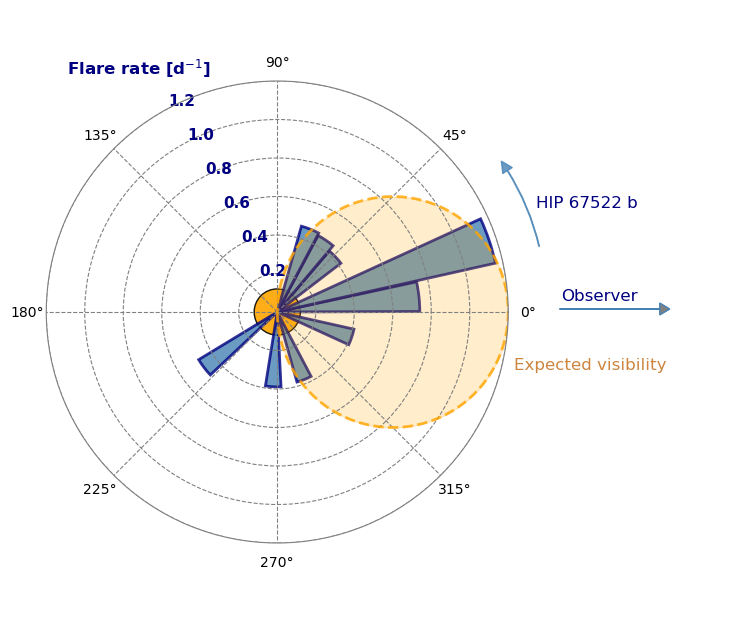

In [71]:
# make a polar histogram based on hist

# make a polar histogram based on hist
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.patches import FancyArrowPatch, Circle

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# make the axes grey
ax.spines['polar'].set_color('grey')

# set the zero to the top
ax.set_theta_zero_location('E')

# set the direction to clockwise
ax.set_theta_direction(1)

ax.set_rlabel_position(118)




# Change the color of the radial (r-axis) labels only
for label in ax.get_yaxis().get_ticklabels():
    label.set_color('navy')  # Set radial labels color to red
    label.set_fontsize(11)  # Optionally adjust the font size
    label.set_fontweight('bold')  # Optionally adjust the font weight

# set the radius limits
ax.set_ylim(0, 1.2)


# ax.hist(phases*2*np.pi , bins=bins*2*np.pi, histtype='stepfilled', color='steelblue', alpha=0.8, 
#         edgecolor='navy', linewidth=2)

ax.bar(binmids*2*np.pi , width=np.pi*2/nbins, height=hist/binned,  facecolor='steelblue', alpha=0.8, 
        edgecolor='navy', linewidth=2)

# ax.plot(np.append(binmids*2*np.pi, binmids[0]*2* np.pi) , np.append(binned/np.max(binned)*1.2, binned[0]/np.max(binned)*1.2),  
#         color="k", linewidth=0.5, linestyle='-', zorder=1000)   


ax.grid(zorder=1, linestyle='--', color='gray')



ax.text(0.2, 1.03, r'Flare rate [d$^{-1}$]', fontsize=12, rotation=0, 
        ha='center', va='center', transform=ax.transAxes, color="navy", fontweight='bold')


circle = Circle((0, 0), radius=0.12, transform=ax.transData._b, facecolor='orange', alpha=0.9, zorder=-1, edgecolor='black')
ax.add_artist(circle)


x = np.linspace(-np.pi/2, np.pi/2, 100)
y = np.cos(x) * 1.2

ax.plot(x, y, color='orange', linewidth=2, linestyle='--', alpha=0.8)
ax.fill_between(x, y, 0, color='orange', alpha=0.2)

# make an orange line that points to the an x, y position

# The new axes will slightly overlap and be 20% larger
ax_larger = fig.add_axes([0.25, 0.0, 1, 1], frameon=False)  # Adjust the coordinates for larger size
# remove axes
ax_larger.yaxis.set_visible(False)
ax_larger.xaxis.set_visible(False)


# ARROW TO EARTH
ax_larger.arrow(2.2, 0.5, 0.5, 0, head_width=0.02, head_length=0.05, fc='grey', ec='steelblue', linewidth=1)
ax_larger.annotate('Observer', xy=(2.5, 0.6), xytext=(2.4, 0.515), fontsize=12, ha='center', color="navy",zorder=10)



# CURVED ARROW AROUND THE HISTOGRAM
arrow = FancyArrowPatch(
    (2.1, 0.6),             # Arrow start (on the edge of the circle)
    (1.9, 0.75),             # Arrow end (90 degrees from the start point)
    mutation_scale=2,  # Scale of the arrow
    color='steelblue',        # Color of the arrowhead
    alpha=0.8,          # Transparency of the arrow
    linewidth=1,        # Line thickness
    arrowstyle='Simple,head_width=4,head_length=4',    # Arrow style
    connectionstyle="arc3,rad=.1"  # Curved connection for the arrow
)

# Add the arrow to the plot
ax_larger.add_patch(arrow)

# ANNOTATION FOR THE ARROW
ax_larger.annotate(r'HIP 67522 b', xy=(2.3, 0.57), xytext=(2.08, 0.67), fontsize=12, ha='left', color="navy")

# ADD BLUE CIRCLE to the position of the curved arrow
# circle = Circle((5.7,1.2), radius=0.2, transform=ax.transData._b, facecolor='steelblue', alpha=0.8, zorder=-1, edgecolor='black')
circle = Circle((5.675,1.4), radius=0.033, transform=ax.transData._b, facecolor='k', alpha=0.8, zorder=10, edgecolor=None)
ax_larger.add_artist(circle)

# ADD TEXT to ORANGE BLOB
ax_larger.annotate(r'Expected visibility', xy=(2.1, .2), xytext=(2.35, 0.4), fontsize=12, ha='center', color="peru")

ax_larger.set_xlim(0,3)
ax_larger.set_ylim(0,1)
# plt.tight_layout()
plt.savefig("../plots/paper/polar.png", dpi=300, bbox_inches='tight')

In [60]:
from astropy.constants import R_sun, R_earth, R_jup

In [61]:
1.4 * R_sun / (1 * R_jup)

<Quantity 13.62362222>

In [62]:
np.append(binned/np.max(binned)*0.8, binned[0]/np.max(binned)*0.8)

array([0.78517634, 0.8       , 0.49399339, 0.4382072 , 0.41418075,
       0.41418075, 0.43995224, 0.47331007, 0.47626745, 0.43550698,
       0.41541146, 0.41109478, 0.42762675, 0.40468406, 0.40064291,
       0.45892726, 0.4853784 , 0.50604335, 0.48293534, 0.5033615 ,
       0.49546289, 0.46840558, 0.44639971, 0.5413299 , 0.78517634])

In [63]:
binmids * 2* np.pi, binmids[0]*2* np.pi

(array([0.13089969, 0.39269908, 0.65449847, 0.91629786, 1.17809725,
        1.43989663, 1.70169602, 1.96349541, 2.2252948 , 2.48709418,
        2.74889357, 3.01069296, 3.27249235, 3.53429174, 3.79609112,
        4.05789051, 4.3196899 , 4.58148929, 4.84328867, 5.10508806,
        5.36688745, 5.62868684, 5.89048623, 6.15228561]),
 0.1308996938995747)

In [64]:
binned

array([4.94733796, 5.04074074, 3.11261574, 2.76111111, 2.60972222,
       2.60972222, 2.77210648, 2.98229167, 3.00092593, 2.74409722,
       2.61747685, 2.59027778, 2.69444444, 2.54988426, 2.5244213 ,
       2.89166667, 3.05833333, 3.18854167, 3.04293981, 3.17164352,
       3.121875  , 2.95138889, 2.81273148, 3.41087963])